In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2014-01-01'
end = '2024-12-31'

df = yf.download('AAPL',start=start,end=end)
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_772\1066523012.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL',start=start,end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.192814,17.314037,17.158312,17.272076,234684800
2014-01-03,16.815174,17.210546,16.798078,17.184438,392467600
2014-01-06,16.906866,16.996073,16.585780,16.705450,412610800
2014-01-07,16.785952,16.969961,16.720056,16.918986,317209200
2014-01-08,16.892260,16.957532,16.743995,16.747723,258529600


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593094,252.889969,250.146586,251.623020,35557500


In [5]:
 df = df.reset_index()
 df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-01-02,17.192814,17.314037,17.158312,17.272076,234684800
1,2014-01-03,16.815174,17.210546,16.798078,17.184438,392467600
2,2014-01-06,16.906866,16.996073,16.585780,16.705450,412610800
3,2014-01-07,16.785952,16.969961,16.720056,16.918986,317209200
4,2014-01-08,16.892260,16.957532,16.743995,16.747723,258529600


In [6]:
df = df.drop(['Date'],axis = 1)
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_772\4046680150.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'],axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,17.192814,17.314037,17.158312,17.272076,234684800
1,16.815174,17.210546,16.798078,17.184438,392467600
2,16.906866,16.996073,16.585780,16.705450,412610800
3,16.785952,16.969961,16.720056,16.918986,317209200
4,16.892260,16.957532,16.743995,16.747723,258529600


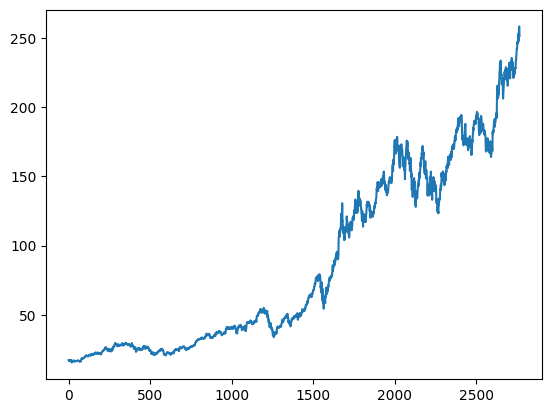

In [7]:
plt.plot(df.Close)

In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,17.192814,17.314037,17.158312,17.272076,234684800
1,16.815174,17.210546,16.798078,17.184438,392467600
2,16.906866,16.996073,16.585780,16.705450,412610800
3,16.785952,16.969961,16.720056,16.918986,317209200
4,16.892260,16.957532,16.743995,16.747723,258529600
...,...,...,...,...,...
2762,254.655716,255.034791,252.840088,254.156919,40858800
2763,257.578674,257.588630,254.675658,254.875189,23234700
2764,258.396667,259.474086,257.010028,257.568678,27237100


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,228.669740
2763,229.057161
2764,229.558170
2765,230.045265


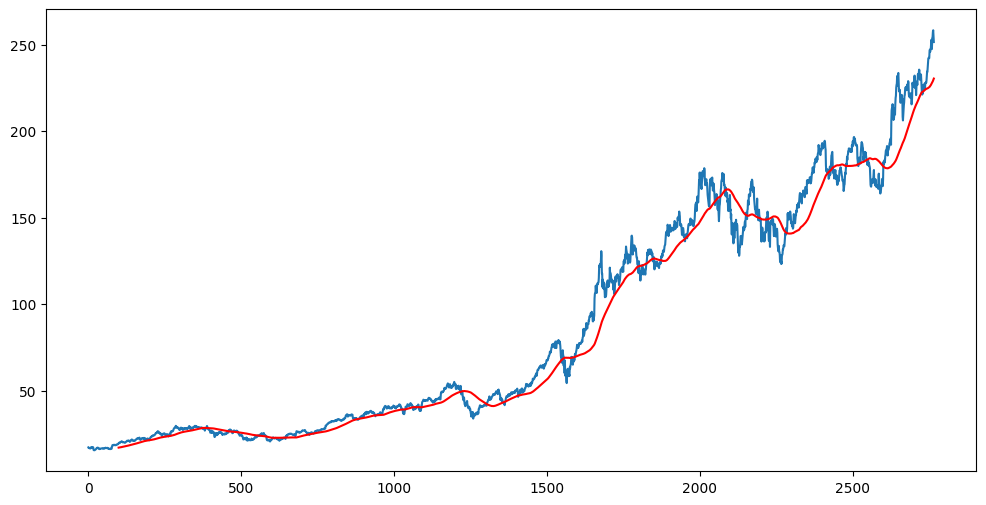

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2762,210.476669
2763,210.905998
2764,211.337031
2765,211.761392


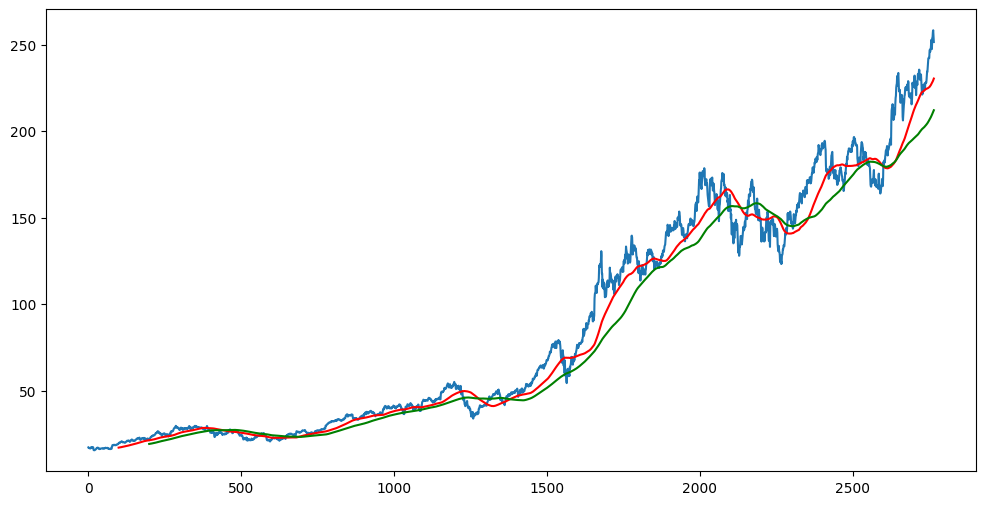

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape


(2767, 5)

In [14]:
#Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1936, 1)
(831, 1)


In [15]:
data_training.head()

Ticker,AAPL
0,17.192814
1,16.815174
2,16.906866
3,16.785952
4,16.892260


In [16]:
data_testing.head()

Ticker,AAPL
1936,146.003265
1937,146.571777
1938,145.170212
1939,146.062073
1940,145.826843


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01201331],
       [0.00927749],
       [0.00994175],
       ...,
       [1.        ],
       [0.98878166],
       [0.9813974 ]])

In [19]:
data_training_array.shape

(1936, 1)

In [20]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i , 0])   

x_train,y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(1836, 100, 1)

In [21]:
#ML Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0546
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 0.0074
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.0044
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0045
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.0040
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.0037
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0035
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0037
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0027
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0033
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.0035
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0027
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0032
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0029
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - l

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

Ticker,AAPL
1936,146.003265
1937,146.571777
1938,145.170212
1939,146.062073
1940,145.826843


In [31]:
data_training.tail(100)

Ticker,AAPL
1836,130.043060
1837,130.424103
1838,128.900055
1839,131.225204
1840,131.615982
...,...
1931,150.590073
1932,151.227127
1933,153.569534
1934,152.021011


In [32]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [35]:
final_df.head()

Ticker,AAPL
0,130.043060
1,130.424103
2,128.900055
3,131.225204
4,131.615982


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07159422],
       [0.07435038],
       [0.06332665],
       [0.0801449 ],
       [0.08297146],
       [0.08063935],
       [0.07491569],
       [0.07420888],
       [0.05993444],
       [0.0675665 ],
       [0.03442436],
       [0.0361911 ],
       [0.04778025],
       [0.0526645 ],
       [0.02888055],
       [0.02222674],
       [0.        ],
       [0.01557278],
       [0.03312752],
       [0.02477485],
       [0.01472337],
       [0.01359081],
       [0.03213656],
       [0.0188289 ],
       [0.03064999],
       [0.02923445],
       [0.02888055],
       [0.01776726],
       [0.01302462],
       [0.01068864],
       [0.01620983],
       [0.0054505 ],
       [0.02208498],
       [0.02215578],
       [0.02810178],
       [0.0308624 ],
       [0.0236424 ],
       [0.03241972],
       [0.05457538],
       [0.04862944],
       [0.05223969],
       [0.06384826],
       [0.054434  ],
       [0.06745867],
       [0.07935056],
       [0.07736866],
       [0.07531578],
       [0.073

In [37]:
input_data.shape

(931, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [41]:
#Making Predictions

y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


In [42]:
y_predicted.shape

(831, 1)

In [43]:
y_test

array([0.18703739, 0.19114954, 0.18101176, 0.18746275, 0.18576129,
       0.16640819, 0.1442901 , 0.14776355, 0.16491941, 0.17186685,
       0.17250479, 0.16151683, 0.13698849, 0.14351023, 0.13408168,
       0.14223403, 0.11735129, 0.13131692, 0.1376262 , 0.14677133,
       0.14400645, 0.14336852, 0.13415254, 0.12989911, 0.15010328,
       0.1577594 , 0.16988197, 0.18554883, 0.18909313, 0.19065299,
       0.18505272, 0.18469821, 0.18951894, 0.18618699, 0.2125585 ,
       0.19292153, 0.18696653, 0.19448149, 0.20490216, 0.20114506,
       0.20497875, 0.19901504, 0.20164206, 0.18112433, 0.18076938,
       0.19582039, 0.19589136, 0.202991  , 0.22066847, 0.25176447,
       0.27079077, 0.27412779, 0.27689642, 0.28065925, 0.24423902,
       0.26859011, 0.30451356, 0.30075095, 0.29358012, 0.27994935,
       0.3046555 , 0.34625847, 0.37394669, 0.37025461, 0.40497117,
       0.378632  , 0.3686218 , 0.40390655, 0.35392574, 0.34597427,
       0.336106  , 0.35910859, 0.37792221, 0.38246591, 0.41121

In [44]:
y_predicted

array([[0.21273583],
       [0.21538304],
       [0.21821114],
       [0.2208064 ],
       [0.22263518],
       [0.22340126],
       [0.22309677],
       [0.22200365],
       [0.22023293],
       [0.21797846],
       [0.21538326],
       [0.21253419],
       [0.2095504 ],
       [0.20653473],
       [0.20355313],
       [0.20061001],
       [0.19779764],
       [0.19513726],
       [0.1926019 ],
       [0.19020689],
       [0.18801394],
       [0.18608627],
       [0.18447003],
       [0.183177  ],
       [0.18218555],
       [0.18150993],
       [0.18119521],
       [0.18130898],
       [0.18194805],
       [0.18318291],
       [0.1849908 ],
       [0.18731117],
       [0.1899477 ],
       [0.19274199],
       [0.19557509],
       [0.19843991],
       [0.20113222],
       [0.20353429],
       [0.20554648],
       [0.20718102],
       [0.20844088],
       [0.20935921],
       [0.2099713 ],
       [0.21034677],
       [0.21050759],
       [0.21044765],
       [0.21018112],
       [0.209

In [45]:
scaler.scale_

array([0.00723319])

In [59]:
scale_factor = 1 / scaler.scale_[0] 
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


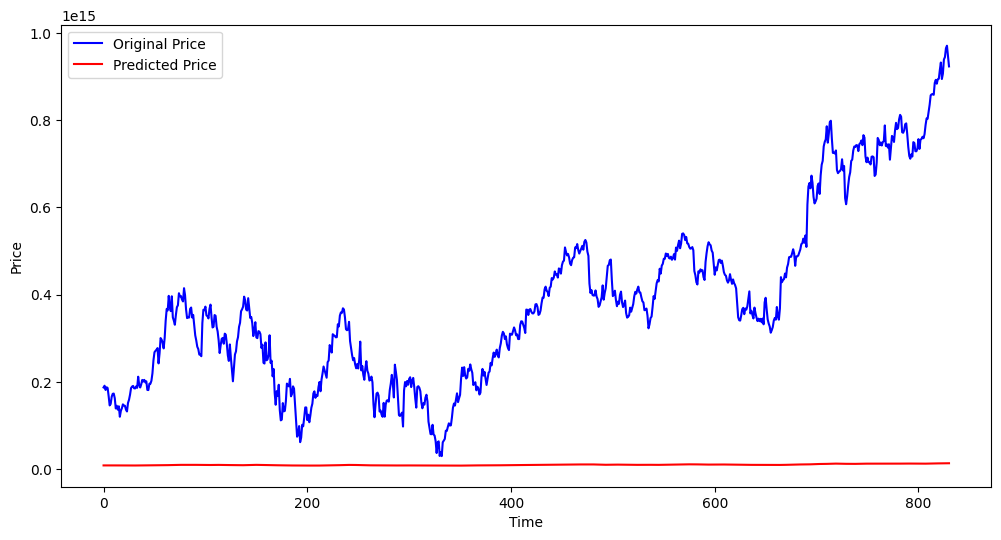

In [61]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()